<a href="https://colab.research.google.com/github/shahidfarhan22/ML_models/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Projects/diabetes_prediction_dataset.csv')

In [5]:
df.shape

(100000, 9)

In [6]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [7]:
for col in df.columns:
    print(col, len(df[col].unique()))

gender 3
age 102
hypertension 2
heart_disease 2
smoking_history 6
bmi 4247
HbA1c_level 18
blood_glucose_level 18
diabetes 2


In [8]:
# @title Process Categorical features
CATEGORICAL_FEATURES = ['gender', 'smoking_history']
def process_categorical_feature(df, categorical_features):
    for col in categorical_features:
        for val in sorted(list(df[col].unique())):
            key = f'{col}_{val}'
            df[key] = (df[col] == val).astype(float)
    return df
df = process_categorical_feature(df, categorical_features=CATEGORICAL_FEATURES)
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,Female,80.0,0,1,never,25.19,6.6,140,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Male,28.0,0,0,never,27.32,5.7,158,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Female,36.0,0,0,current,23.45,5.0,155,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Male,76.0,1,1,current,20.14,4.8,155,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
label_col = 'diabetes'
feature_cols = [
    col for col in df.columns
    if col != label_col and col not in CATEGORICAL_FEATURES]
raw_features = [
    'gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
    'bmi', 'HbA1c_level', 'blood_glucose_level'
]

df_processed = df[feature_cols + [label_col]].astype(float)
print(len(feature_cols))
df_processed.head()

15


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,diabetes
0,80.0,0.0,1.0,25.19,6.6,140.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,54.0,0.0,0.0,27.32,6.6,80.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28.0,0.0,0.0,27.32,5.7,158.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,36.0,0.0,0.0,23.45,5.0,155.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,76.0,1.0,1.0,20.14,4.8,155.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [10]:
positive_ = df_processed[df_processed.diabetes == 1]
negative_ = df_processed[df_processed.diabetes == 0]

In [11]:
def plot_feature_vs_label(df, feature_col, label_col='diabetes'):
    bins = np.linspace(
        df[feature_col].min(), df[feature_col].max(), 10)
    plt.figure(figsize=(6, 3))
    positive = df[df[label_col] == 1.0]
    negative = df[df[label_col] != 1.0]

    plt.hist(positive[feature_col].tolist(), bins, alpha=0.4, label=label_col)
    plt.hist(negative[feature_col].tolist(), bins, alpha=0.4, label=f'non-{label_col}')
    plt.legend(loc='upper right')
    plt.xlabel(feature_col)
    plt.ylabel('count')
    plt.title(f'diabetes vs {feature_col}')
    plt.show()

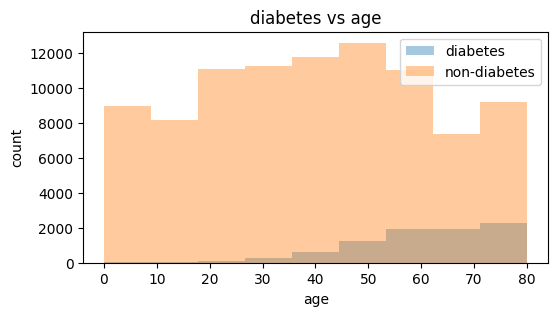

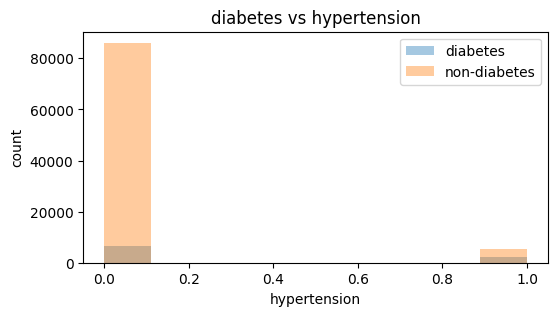

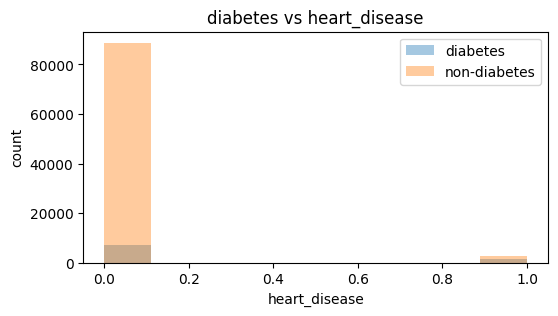

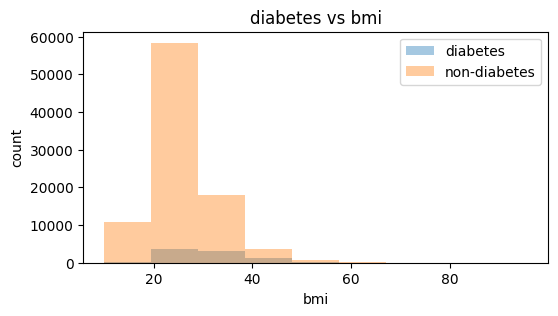

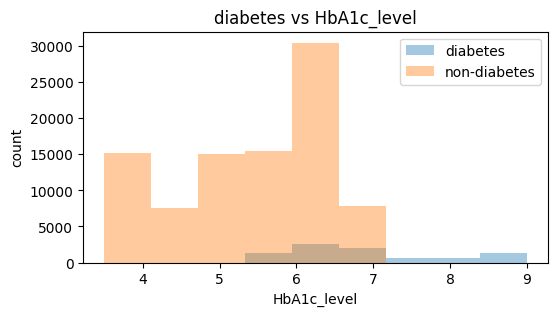

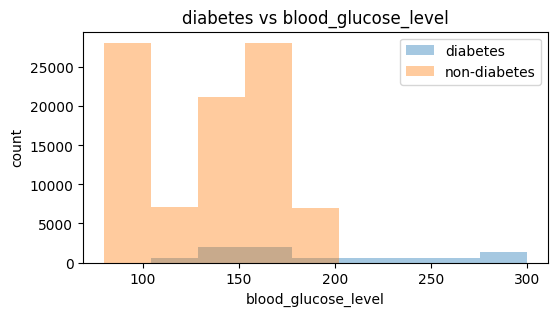

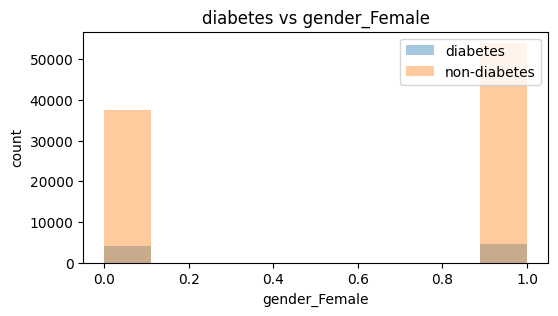

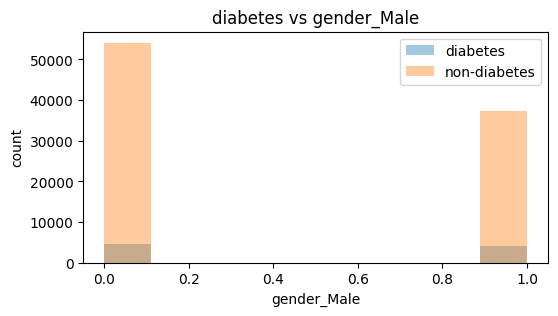

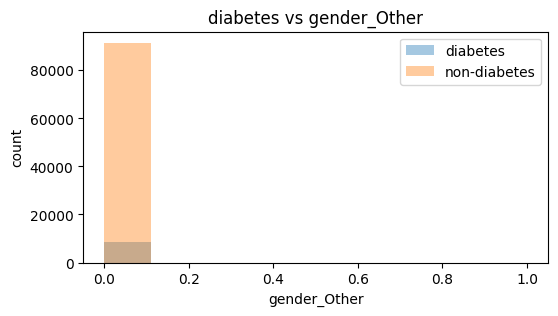

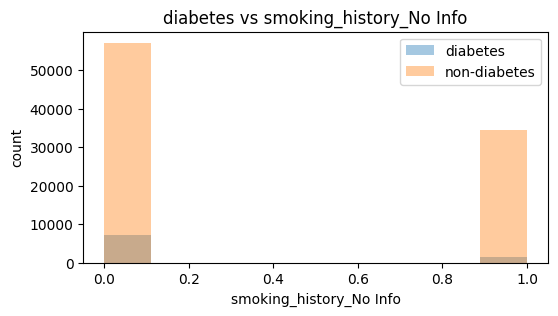

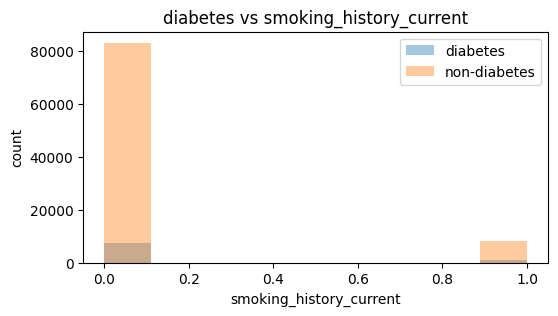

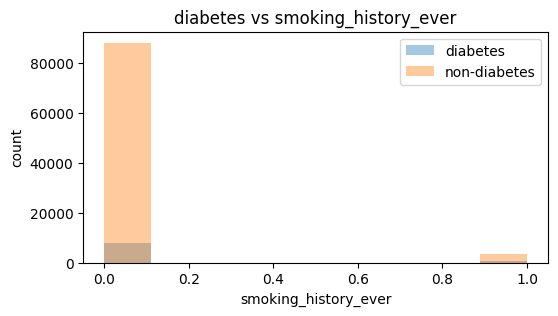

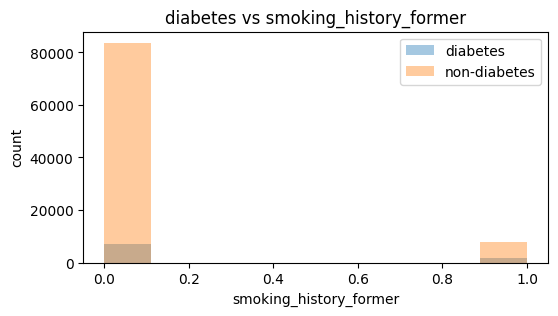

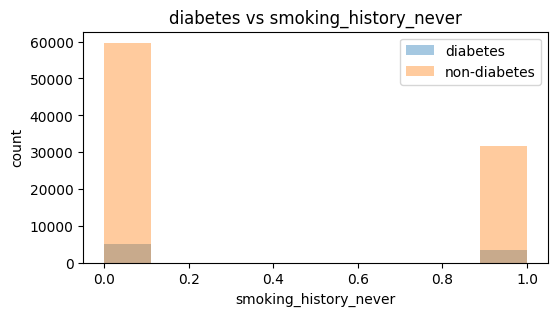

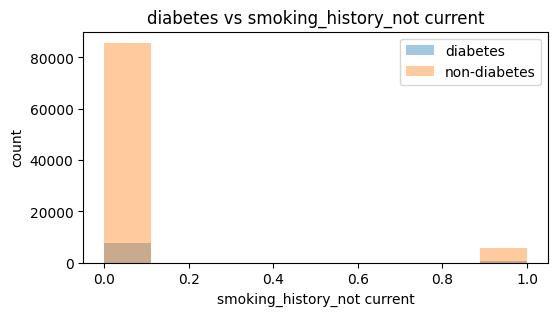

In [12]:
for col in feature_cols:
    plot_feature_vs_label(
        df=df_processed, feature_col=col, label_col='diabetes')

In [13]:
# @title Start Machine Learning
from sklearn.model_selection import train_test_split
train, valid = train_test_split(
    df, test_size=0.3, random_state=7)
print(train.shape)
print(valid.shape)

(70000, 18)
(30000, 18)


In [14]:
from sklearn.metrics import auc, roc_auc_score, precision_recall_curve

all_model_results = []

def get_metrics(results_df):
    precision, recall, thresholds = precision_recall_curve(
        results_df['label'], results_df['probability'])
    auprc = auc(recall, precision)
    auroc = roc_auc_score(
        results_df['label'], results_df['probability'])
    accuracy = (results_df['pred'] == results_df['label']).astype(
        float).sum() / results_df.shape[0]
    baseline_accuracy = (logisticRegrRes['label'] == 0).astype(
        float).sum() / logisticRegrRes.shape[0]
    return {
        'auprc': auprc,
        'auroc': auroc,
        'accuracy': accuracy,
        'baseline_accuracy': baseline_accuracy
    }

In [15]:
# @title Start Logistic Regression
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(train[feature_cols], train[label_col])
logisticRegrRes = pd.DataFrame({
    'pred': logisticRegr.predict(valid[feature_cols]),
    'probability': logisticRegr.predict_proba(valid[feature_cols])[:, 1],
    'label': valid[label_col]
})
print('Logistic Regression')
metrics_ = get_metrics(logisticRegrRes)
metrics_['model'] = 'LogisticRegression'
all_model_results.append(metrics_)
metrics_

Logistic Regression


{'auprc': 0.8173283674737272,
 'auroc': 0.9622878176984756,
 'accuracy': 0.9592333333333334,
 'baseline_accuracy': 0.9143666666666667,
 'model': 'LogisticRegression'}

In [16]:
# @title SVM
from sklearn.svm import SVC
SVMClassifier = SVC(probability=True)
SVMClassifier.fit(train[feature_cols], train[label_col])

SVMRes = pd.DataFrame({
    'pred': SVMClassifier.predict(valid[feature_cols]),
    'probability': SVMClassifier.predict_proba(valid[feature_cols])[:, 1],
    'label': valid[label_col]
})

print('SVM')
metrics_ = get_metrics(SVMRes)
metrics_['model'] = 'SVM'
all_model_results.append(metrics_)
metrics_

SVM


{'auprc': 0.8220530203450641,
 'auroc': 0.9596725008978613,
 'accuracy': 0.9451,
 'baseline_accuracy': 0.9143666666666667,
 'model': 'SVM'}

In [17]:
# @title KNN
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier = KNeighborsClassifier(n_neighbors=5)
KNNClassifier.fit(train[feature_cols], train[label_col])

KNNRes = pd.DataFrame({
    'pred': KNNClassifier.predict(valid[feature_cols]),
    'probability': KNNClassifier.predict_proba(valid[feature_cols])[:, 1],
    'label': valid[label_col]
})

print('KNN')
metrics_ = get_metrics(KNNRes)
metrics_['model'] = 'KNN'
all_model_results.append(metrics_)
metrics_

KNN


{'auprc': 0.7440236087560881,
 'auroc': 0.8766129273380214,
 'accuracy': 0.9533666666666667,
 'baseline_accuracy': 0.9143666666666667,
 'model': 'KNN'}

In [18]:
# @title Naive Bayes
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(train[feature_cols], train[label_col])
NBRes = pd.DataFrame({
    'pred': NBClassifier.predict(valid[feature_cols]),
    'probability': NBClassifier.predict_proba(valid[feature_cols])[:, 1],
    'label': valid[label_col]
})

print('NB')
metrics_ = get_metrics(NBRes)
metrics_['model'] = 'NB'
all_model_results.append(metrics_)
metrics_

NB


{'auprc': 0.4909523516526155,
 'auroc': 0.9096829301231687,
 'accuracy': 0.8546666666666667,
 'baseline_accuracy': 0.9143666666666667,
 'model': 'NB'}

In [19]:
# @title Decision Tree
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier()
DTClassifier.fit(train[feature_cols], train[label_col])
DTRes = pd.DataFrame({
    'pred': DTClassifier.predict(valid[feature_cols]),
    'probability': DTClassifier.predict_proba(valid[feature_cols])[:, 1],
    'label': valid[label_col]
})

print('DecisionTree')
metrics_ = get_metrics(DTRes)
metrics_['model'] = 'DecisionTree'
all_model_results.append(metrics_)
metrics_

DecisionTree


{'auprc': 0.7380634727151061,
 'auroc': 0.8561221993301313,
 'accuracy': 0.9525666666666667,
 'baseline_accuracy': 0.9143666666666667,
 'model': 'DecisionTree'}

In [20]:
# @title PCA
from sklearn.decomposition import PCA

In [21]:
N_COMP = 15
PCA_FEATURES = [f'pc{i+1}' for i in range(N_COMP)]

class PCATransformer:

    def __init__(
        self, n_components_, train_df_,
        feature_cols_, target_col_, normalize_=True):
        self._pca = PCA(n_components=n_components_)
        self._pca_cols = [f'pc{i+1}' for i in range(n_components_)]
        self._feature_cols = feature_cols_
        self._target_col = target_col_
        self._is_normalize = normalize_
        self._data = pd.DataFrame(train_df_)
        if self._is_normalize:
            train_df_ = self._normalize(train_df_)
            self._pca.fit(train_df_[self._feature_cols])

    def _normalize(self, df):
        df_ = pd.DataFrame(df)
        for col in self._feature_cols:
            df_[col] = (
                df_[col] - self._data[col].min()) / (
                self._data[col].max() - self._data[col].min())
        return df_

    def transform(self, df):
        if self._is_normalize:
            df = self._normalize(df)
        transformed_data = self._pca.transform(df[self._feature_cols])
        transformed_df = pd.DataFrame(
            data=transformed_data,
            columns=self._pca_cols)
        transformed_df[self._target_col] = df[self._target_col].tolist()
        return transformed_df

In [22]:
pca_transformer = PCATransformer(N_COMP, train, feature_cols, label_col, normalize_=True)
train_pca = pca_transformer.transform(train)
valid_pca = pca_transformer.transform(valid)

In [23]:
train_pca.head(5)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,diabetes
0,-0.547387,-0.228082,0.266636,-0.480021,-0.732951,0.777966,0.467445,-0.115119,-0.971967,0.295089,0.043828,-0.246525,-0.001192,8.911880e-17,-1.031884e-16,0
1,-0.538608,-0.226327,0.179399,-0.428251,-0.555647,0.084497,0.337192,1.090116,-0.967018,0.210406,0.084109,-0.252184,0.000170,9.479814e-17,-2.558139e-17,0
2,-0.385640,-0.934527,-0.387413,-0.250854,-0.346431,-0.105875,0.305178,0.072159,-1.014483,0.256228,0.069692,-0.227497,0.000009,7.224674e-17,-1.921148e-16,0
3,-0.385435,-0.933921,-0.386144,-0.248406,-0.342601,-0.105119,0.304223,0.071051,-0.980383,0.251022,0.044591,-0.229847,0.000014,7.224674e-17,-1.921148e-16,0
4,0.625719,0.772501,-0.569890,-0.359689,-0.473925,-0.107502,0.335853,0.075425,-1.050086,0.258426,0.088308,-0.246523,-0.000064,-1.350527e-16,-3.252029e-17,0


In [24]:
valid_pca.head(5)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,diabetes
0,0.796051,0.261785,0.503413,-0.025464,-0.178848,0.927053,-0.140431,-0.236859,-0.069492,-0.109735,-0.212749,-0.007156,-0.001334,-1.051702e-16,-4.767728e-17,0
1,-0.738580,0.464696,-0.405627,-0.203208,-0.252513,-0.087622,0.241645,0.018106,0.251919,0.083417,-0.087271,0.029411,-0.000272,5.923631e-17,1.340132e-16,0
2,-0.753018,0.517475,-0.280801,-0.021567,-0.053940,-0.036615,-0.037433,-0.013689,0.091703,-0.017355,-0.099278,0.018878,-0.000151,8.699189e-17,1.062576e-16,0
3,0.608937,0.891974,-0.302423,0.045217,0.028753,0.004049,-0.156039,-0.037566,0.091878,-0.090786,0.001429,-0.020778,-0.000182,-1.350527e-16,1.062576e-16,0
4,0.954335,-0.377852,-0.023724,0.496264,0.804629,0.110604,0.435731,-0.026058,-0.137757,-0.176788,-0.070288,0.234006,-0.000249,-1.101999e-17,2.992976e-17,0


In [25]:
train_pca.groupby(label_col).count()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15
diabetes,,,,,,,,,,,,,,,
0,64069,64069,64069,64069,64069,64069,64069,64069,64069,64069,64069,64069,64069,64069,64069
1,5931,5931,5931,5931,5931,5931,5931,5931,5931,5931,5931,5931,5931,5931,5931


Text(0.5, 0, 'pc3')

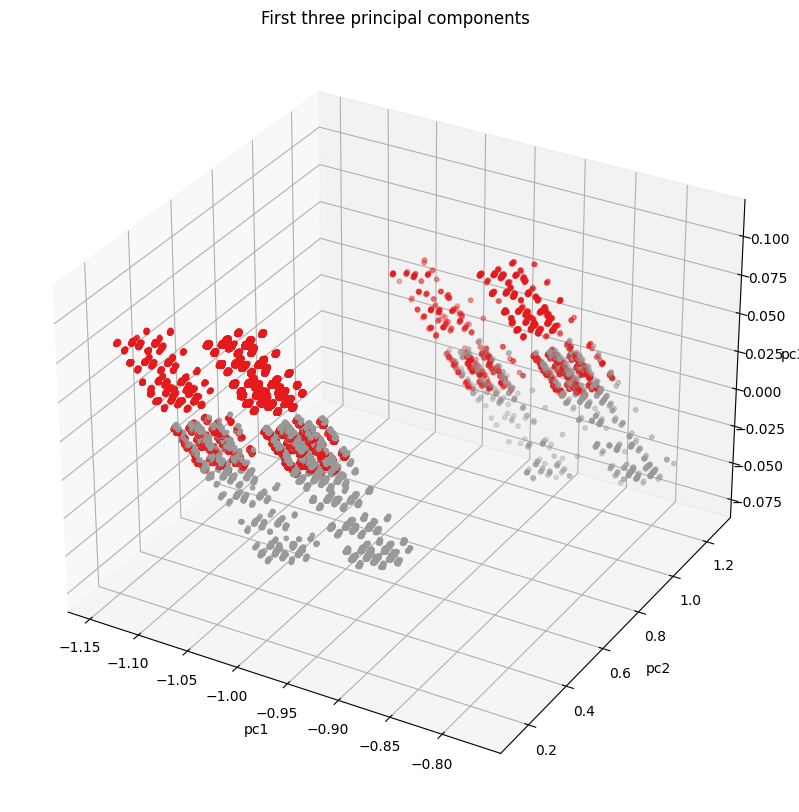

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

fig = plt.figure(1,figsize=(12, 10))

ax = fig.add_subplot(projection='3d')
ax.scatter(
    train_pca['pc9'], train_pca['pc10'], train_pca['pc11'], c=train_pca[label_col],
           cmap=plt.cm.Set1, s=10)
ax.set_title("First three principal components")
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')

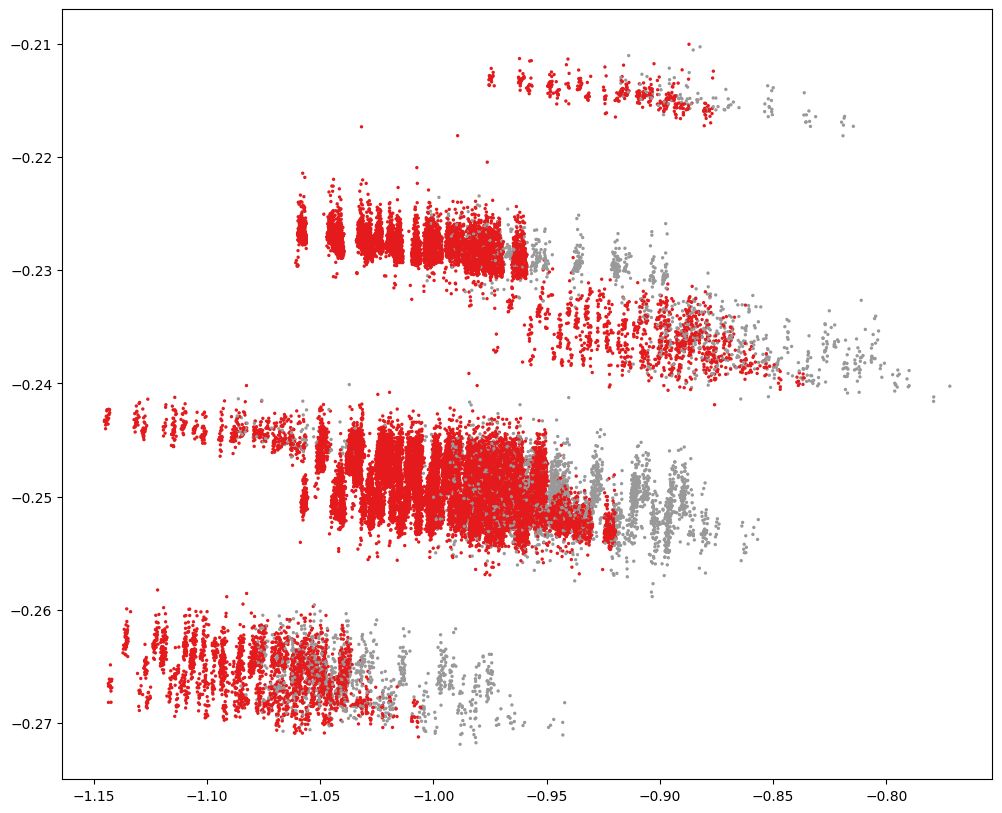

In [27]:
fig = plt.figure(1,figsize=(12, 10))

plt.scatter(
    train_pca['pc9'], train_pca['pc12'], c=train_pca[label_col],
           cmap=plt.cm.Set1, s=2)
# ax.set_title("First three principal components")
# ax.set_xlabel('pc1')
# ax.set_ylabel('pc2')
# ax.set_zlabel('pc3')

In [28]:
# @title LogisticRegression After PCA
features_ = [PCA_FEATURES[9], PCA_FEATURES[10], PCA_FEATURES[11], PCA_FEATURES[12]]
logisticRegrPCA = LogisticRegression()
logisticRegrPCA.fit(train_pca[PCA_FEATURES], train_pca[label_col])
logisticRegrPCARes = pd.DataFrame({
    'pred': logisticRegrPCA.predict(valid_pca[PCA_FEATURES]),
    'probability': logisticRegrPCA.predict_proba(valid_pca[PCA_FEATURES])[:, 1],
    'label': valid_pca[label_col]
})
get_metrics(logisticRegrPCARes)

{'auprc': 0.5541069924178601,
 'auroc': 0.6141044803324706,
 'accuracy': 0.08563333333333334,
 'baseline_accuracy': 0.9143666666666667}

In [29]:
for n_pc in range(1, 16):
    logisticRegrPCA = LogisticRegression()
    logisticRegrPCA.fit(
        train_pca[PCA_FEATURES[:n_pc]], train_pca[label_col])
    logisticRegrPCARes = pd.DataFrame({
        'pred': logisticRegrPCA.predict(
            valid_pca[PCA_FEATURES[:n_pc]]),
        'probability': logisticRegrPCA.predict_proba(
            valid_pca[PCA_FEATURES[:n_pc]])[:, 1],
        'label': valid_pca[label_col]
    })
    print('-' * 100)
    print(n_pc)
    print(get_metrics(logisticRegrPCARes)['accuracy'])

----------------------------------------------------------------------------------------------------
1
0.9143666666666667
----------------------------------------------------------------------------------------------------
2
0.9143666666666667
----------------------------------------------------------------------------------------------------
3
0.9143666666666667
----------------------------------------------------------------------------------------------------
4
0.9119
----------------------------------------------------------------------------------------------------
5
0.8599666666666667
----------------------------------------------------------------------------------------------------
6
0.8561333333333333
----------------------------------------------------------------------------------------------------
7
0.3123666666666667
----------------------------------------------------------------------------------------------------
8
0.28813333333333335
-----------------------------------

In [30]:
# @title KNN After PCA
KNNClassifierPCA = KNeighborsClassifier(n_neighbors=5)
KNNClassifierPCA.fit(train_pca[PCA_FEATURES], train_pca[label_col])
KNNPCARes = pd.DataFrame({
    'pred': KNNClassifierPCA.predict(valid_pca[PCA_FEATURES]),
    'probability': KNNClassifierPCA.predict_proba(valid_pca[PCA_FEATURES])[:, 1],
    'label': valid_pca[label_col]
})
get_metrics(KNNPCARes)

{'auprc': 0.5418663347662493,
 'auroc': 0.49922743982747103,
 'accuracy': 0.0858,
 'baseline_accuracy': 0.9143666666666667}

In [31]:
NBClassifierPCA = GaussianNB()
NBClassifierPCA.fit(train_pca[PCA_FEATURES], train_pca[label_col])
NBRes = pd.DataFrame({
    'pred': NBClassifierPCA.predict(valid_pca[PCA_FEATURES]),
    'probability': NBClassifierPCA.predict_proba(valid_pca[PCA_FEATURES])[:, 1],
    'label': valid_pca[label_col]
})
get_metrics(NBRes)

{'auprc': 0.5428252317130092,
 'auroc': 0.5001093653166127,
 'accuracy': 0.08583333333333333,
 'baseline_accuracy': 0.9143666666666667}

In [32]:
DTClassifierPCA = DecisionTreeClassifier()
DTClassifierPCA.fit(train_pca[PCA_FEATURES], train_pca[label_col])
DTPCARes = pd.DataFrame({
    'pred': DTClassifierPCA.predict(valid_pca[PCA_FEATURES]),
    'probability': DTClassifierPCA.predict_proba(valid_pca[PCA_FEATURES])[:, 1],
    'label': valid[label_col]
})
get_metrics(DTPCARes)

{'auprc': 0.5174507008218299,
 'auroc': 0.4900564690861911,
 'accuracy': 0.11196666666666667,
 'baseline_accuracy': 0.9143666666666667}